In [1]:
#!/usr/bin/python

import numpy as np
import math
from astropy.io import fits as fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from pandas import DataFrame, Series
from astropy.wcs import WCS as WCS

import import_ipynb
import Pipe3D_Asier_Test as Pipe3D

from mpdaf.obj import hms2deg
from mpdaf.obj import dms2deg

/home/asier/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: Ru

importing Jupyter notebook from Pipe3D_Asier_Test.ipynb


/home/asier/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/signal/_max_len_seq.py:8: RuntimeWarning: numpy.dtype size changed, may ind

In [2]:
line = 'ASASSN13ch'

In [3]:
df = pd.read_csv('Amusing_Table.csv')  # To find the Galaxy data
Names_1 = df['SN_name']
Names_2 = df['def_name']
R = 0

for names in Names_1:              # Finding the Galaxy in the DataFrame
    R=R+1
    if line == names:
        Row = R-1
R = 0
for names in Names_2:              # Some Galaxies have the name in other column
    R=R+1
    if line == names:
        Row = R-1

# Pixel de la SN
Pix_X = df.at[Row,'SNX'] -1
Pix_Y = df.at[Row,'SNY'] -1
# Pixel del centro de la Galaxia
Pix_X_GAL = df.at[Row,'GALX'] -1
Pix_Y_GAL = df.at[Row,'GALY'] -1

# Supernova type
if df.at[Row,'SN_type'] == 'Ia':
    SN_TYPE = 1
elif df.at[Row,'SN_type'] == 'II':
    SN_TYPE = 2
else:
    SN_TYPE = 0

In [4]:
# Call to Pipe3D code
line = Pipe3D.Pipe3D_galaxy(line)
# Generate the enviroment

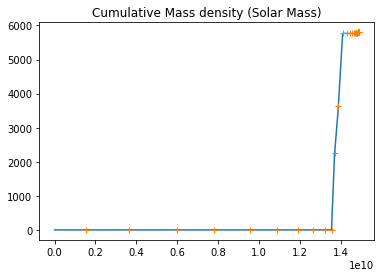

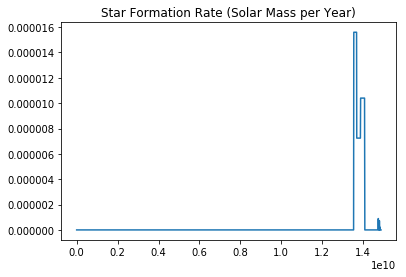

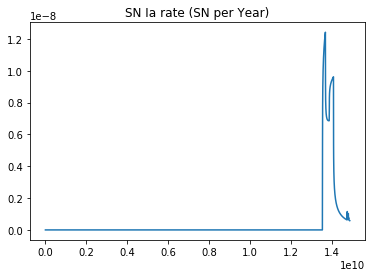

-0.0
5.805609963426613e-10


In [5]:
# Tau array sorted and unique
s_SSP_id, s_age_SSP, s_met, s_logML = np.loadtxt('SSP_logML.txt', unpack='True')
s_age_SSP_sorted = np.argsort( s_age_SSP )
s_age = np.unique(s_age_SSP)
s_tau = np.sqrt( np.r_[ 0, s_age ] * np.r_[ s_age, 2*s_age[-1]-s_age[-2] ] ) * 1e9 # geometric mean between SSP ages

# Cumulative mass density (Solas Mass)
mass_density = line.cumulative_surface_density_spaxel(170, 170, False )

# Cosmic time (years)
AgeUnivers = s_tau[len(s_tau)-1]
t = AgeUnivers - s_tau

# Correction for numerical problems
mass_density = mass_density[:len(mass_density)-1]
t = t[:len(t)-1]

# Linear Cosmic Time
dt= (t[0]-t[1])
time = t[0] - np.arange(t[0]/dt) *dt

# Todas las unidades son por parsec cuadrado!!

# Linear Cumulative Mass (Solar Mass)
cumulative_mass = np.interp(-time, -t, mass_density)

# Star formation rate (Solar Mass per years)
sfr = -np.gradient(cumulative_mass) / dt

# Delay Time Distribution (SN per Year per Solar Mass)
dtd = 1e-4 * time**-1

# SN Ia rate (SN per Year)
snr = dt * np.convolve(sfr,dtd)

plt.plot(time,cumulative_mass)
plt.plot(t,mass_density,'+')
plt.title('Cumulative Mass density (Solar Mass)')
plt.show()

plt.plot(time,sfr)
plt.title('Star Formation Rate (Solar Mass per Year)')
plt.show()

plt.plot(time,snr[len(snr)/2:])
plt.title('SN Ia rate (SN per Year)')
plt.show()

# Recent time to calculate de mean SN CC Rate (Million of years)
recent_time = 10
n = np.int(np.round(recent_time / (dt/1e6)))

# Puedo crear un DTD para las SNCC que sea una funcion escalon de ancho recent_time!!!!!!!!!!!!!!!

# Rate of SN Core Collapse (SN per year)
rateII = sfr[1]
print(rateII)

# Rate of SN Ia
rateIa = snr[len(snr)/2]
print(rateIa)

In [6]:
print(np.sum(dtd*dt)) # SN Ia per Solar Mass Formed.

0.001261159633884674


8588
8588
8587


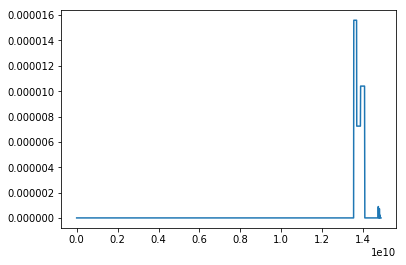

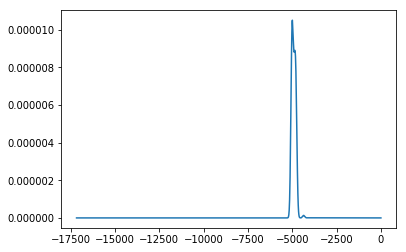

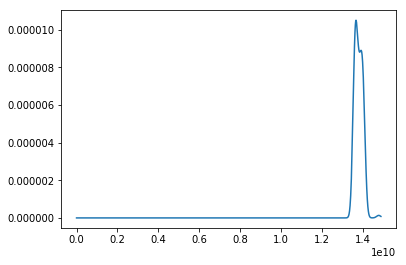

8588


In [7]:
from scipy import signal
temporal_smooth = 100 # Sigma of the gaussian in Millions of years
gaus = signal.gaussian(len(time),temporal_smooth*1e6/dt)

formacion = np.convolve(sfr,gaus)/np.sum(gaus)

print(len(sfr))
print(len(gaus))
print(len(formacion)/2)

plt.plot(time,sfr)
plt.show()
plt.plot(-np.arange(len(formacion)),formacion)
plt.show()

formacion = formacion[len(formacion)/4:len(formacion)*3/4]
plt.plot(time,formacion)
plt.show()
print(len(formacion))

8588
8588
8587


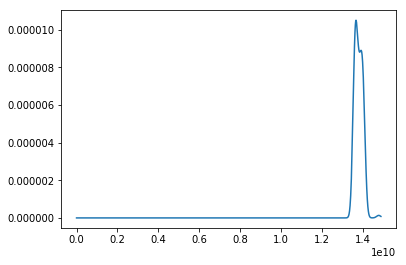

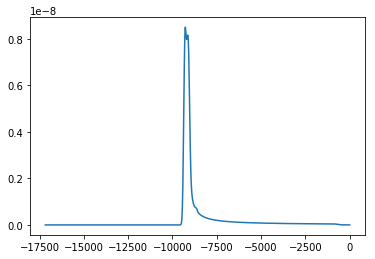

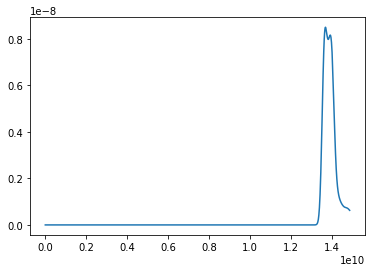

8588
6.274727626297565e-10


In [8]:
supernova = dt * np.convolve(formacion,dtd)

print(len(formacion))
print(len(dtd))
print(len(supernova)/2)

plt.plot(time,formacion)
plt.show()
plt.plot(-np.arange(len(supernova)),supernova)
plt.show()

supernova = supernova[len(supernova)/2:]
plt.plot(time,supernova)
plt.show()
print(len(supernova))

print(supernova[0])

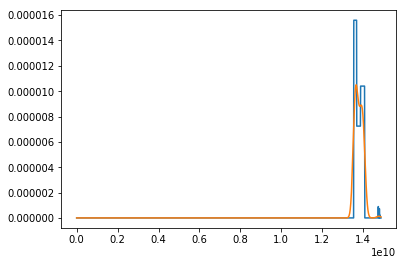

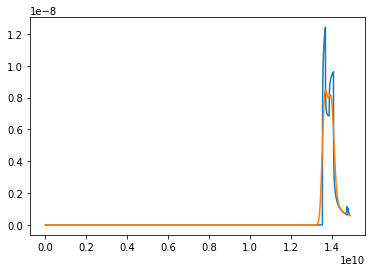

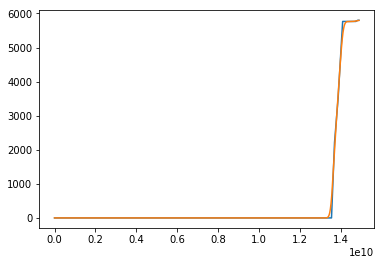

II raw = -0.0
II aprox=8.01793696518e-08
Ia raw = 5.80560996343e-10
Ia aprox=6.2747276263e-10


In [9]:
from scipy import signal
temporal_smooth = 100 # Sigma of the gaussian in Millions of years
gaus = signal.gaussian(len(time),temporal_smooth*1e6/dt)

formacion = np.convolve(sfr,gaus)/np.sum(gaus)
formacion = formacion[len(formacion)/4:len(formacion)*3/4]

plt.plot(time,sfr)
plt.plot(time,formacion)
plt.show()

supernova = dt * np.convolve(formacion,dtd)
supernova = supernova[len(supernova)/2:]


plt.plot(time,snr[len(snr)/2:])
plt.plot(time,supernova)
plt.show()


masa = np.flipud(np.cumsum(np.flipud(formacion*dt))) + cumulative_mass[len(cumulative_mass)-1]

plt.plot(time,cumulative_mass)
plt.plot(time,masa)
plt.show()

ratioII = formacion[0]
print('II raw = {}'.format(rateII))
print('II aprox={}'.format(ratioII))

ratioIa = supernova[0]
print('Ia raw = {}'.format(rateIa))
print('Ia aprox={}'.format(ratioIa))

In [10]:
print(100*(np.sum(sfr*dt)-np.sum(formacion*dt))/np.sum(sfr*dt)) # Porcentaje de masa perdida.
print(100*(np.sum(sfr[:n]*dt)-np.sum(formacion[:n]*dt))/np.sum(sfr[:n]*dt)) # Porcentaje de masa reciente perdida

0.09313420003808669
-inf


/home/asier/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


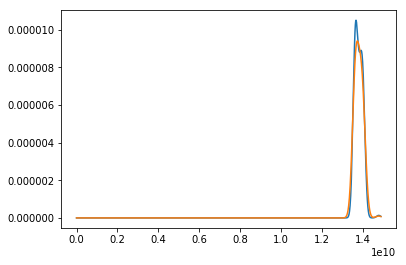

8588
8588
8.017936965176117e-08
7.440843346102378e-08


In [11]:
sfr = -np.gradient(cumulative_mass) / dt
from scipy import signal
temporal_smooth = 100 # Sigma of the gaussian in Millions of years
gaus = signal.gaussian(len(time),temporal_smooth*1e6/dt)
formacion = np.convolve(sfr,gaus)/np.sum(gaus)


sigma = 100

distribucion = signal.gaussian(len(time),sigma*1e6/dt)

nucleos = np.convolve(formacion,distribucion)/np.sum(distribucion)

formacion = formacion[len(formacion)/4:len(formacion)*3/4]
nucleos = nucleos[(len(nucleos)-1)/3:(len(nucleos)+1)*2/3]

plt.plot(time,formacion)
plt.plot(time,nucleos)
plt.show()

print(len(formacion))
print(len(nucleos))

print(formacion[0])
print(nucleos[0])


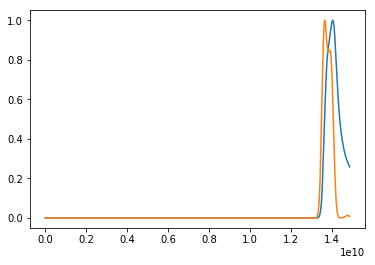

In [12]:
alfa = 1
delta = 50

delta = int(delta*1e6/dt)
dtd = 1e-4 * time**-alfa
dtd[len(time)-delta:] = 0

supernova = dt * np.convolve(formacion,dtd)
supernova = supernova[len(supernova)/2:]

plt.plot(time,supernova/np.max(supernova))
plt.plot(time,formacion/np.max(formacion))
plt.show()

In [43]:
line =  'ASASSN13an'
hdu = fits.open( '../Data/Amusing/'+line+'.SSP.cube.fits' )
Segmentation = hdu[0].data[1]
line = Pipe3D.Pipe3D_galaxy(line)

In [44]:
alfa = 1.0
delta = 0.0
sigma = 1.0


zones = np.unique(Segmentation)
Nzones = len(zones)
rateIa = np.zeros(Nzones)
rateII = np.zeros(Nzones)
masa = np.zeros(Nzones)

# Delay Time Distribution (SN per Year per Solar Mass)
delta = int(delta*1e6/dt)
dtd = 1e-4 * time**-alfa
dtd[len(time)-delta:] = 0

for zone in np.arange(Nzones):
    i_zone=0
    j_zone=0
    
    for i in range(line.Ny):
        if zone == int(Segmentation[i_zone,j_zone]):
            break
        for j in range(line.Nx):
            if zone == int(Segmentation[i,j]):
                i_zone = i
                j_zone = j
                break
    
    # Reading the data.
    mass_density = line.cumulative_surface_density_spaxel(i_zone, j_zone, False)
    # Correction for numerical problems
    mass_density = mass_density[:len(mass_density)-1]
                
                # Linear Cumulative Mass (Solar Mass)
    cumulative_mass = np.interp(-time, -t, mass_density)
                
                # Star formation rate (Solar Mass per years)
    sfr = -np.gradient(cumulative_mass) / dt
    base = len(sfr)
                
    temporal_smooth = 100 # Sigma of the gaussian in Millions of years
    gaus = signal.gaussian(len(time),temporal_smooth*1e6/dt)
    extra = len(gaus[gaus>np.max(gaus)*1e-3])
                
    sfr = np.convolve(sfr,gaus[gaus>np.max(gaus)*1e-3])/np.sum(gaus[gaus>np.max(gaus)*1e-3])
                
                # Core Collapse Distribution
    ccd = signal.gaussian(len(time),sigma*1e6/dt)
    extra2 = len(ccd[ccd>np.max(ccd)*1e-3])
                
                # SN CC rate (SN per Year)
    ccr = np.convolve(sfr,ccd[ccd>np.max(ccd)*1e-3])/np.sum(ccd[ccd>np.max(ccd)*1e-3])
                
                # Resize
    sfr = sfr[extra/2:base+extra/2]
    ccr = ccr[(extra+extra2)/2:base+(extra+extra2)/2]
                
                # SN Ia rate (SN per Year)
    snr = dt * np.convolve(sfr,dtd,'valid')
                
                # Rate of SN Core Collapse (SN per year)
    rateII[zone] = ccr[0]
                
                # Rate of SN Ia
    rateIa[zone] = snr[0]
    masa[zone] = mass_density[0]

# Galaxy maps
SNII_rate_map = np.interp(Segmentation, zones, rateII)
SNIa_rate_map = np.interp(Segmentation, zones, rateIa)
masa_map = np.interp(Segmentation, zones, masa)

In [45]:
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
# Gaussian function
stddev = 7
gauss = Gaussian2DKernel(stddev)
    
# Gaussian convolve
SNII_rate_map = convolve(SNII_rate_map, gauss)
SNIa_rate_map = convolve(SNIa_rate_map, gauss)
masa_map = convolve(masa_map, gauss)
    
# Eliminate negative values
SNII_rate_map[SNII_rate_map<0.0] = 0.0
SNIa_rate_map[SNIa_rate_map<0.0] = 0.0

In [46]:
# An Array whit all the value of the SN II rate map
Prob_List_II = np.ndarray.flatten(SNII_rate_map)
Prob_List_Ia = np.ndarray.flatten(SNIa_rate_map)
# The array orther in value
Order_Prob_List_II = np.sort(Prob_List_II)
Order_Prob_List_Ia = np.sort(Prob_List_Ia)

# Normalize
Norm_SNII = 0
for i in range(len(Order_Prob_List_II)):
    Norm_SNII = Norm_SNII + Order_Prob_List_II[i]
Order_Prob_List_II = Order_Prob_List_II / Norm_SNII
SNII_rate_map = SNII_rate_map / Norm_SNII

Norm_SNIa = 0
for i in range(len(Order_Prob_List_Ia)):
    Norm_SNIa = Norm_SNIa + Order_Prob_List_Ia[i]
Order_Prob_List_Ia = Order_Prob_List_Ia / Norm_SNIa
SNIa_rate_map = SNIa_rate_map / Norm_SNIa

In [47]:
# Calculate P
cumulative_P_values_II = np.cumsum(Order_Prob_List_II)
cumulative_P_values_Ia = np.cumsum(Order_Prob_List_Ia)

# Calculate P map
cumulative_SNII_rate_map = np.interp(SNII_rate_map, Order_Prob_List_II, cumulative_P_values_II)
cumulative_SNIa_rate_map = np.interp(SNIa_rate_map, Order_Prob_List_Ia, cumulative_P_values_Ia)

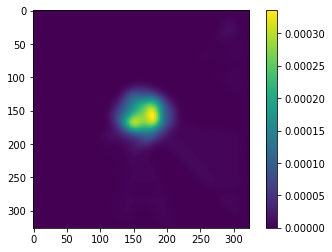

In [57]:
plt.imshow(SNII_rate_map)
plt.colorbar()
plt.show()

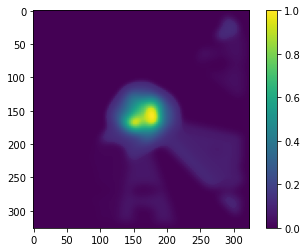

In [58]:
plt.imshow(cumulative_SNII_rate_map)
plt.colorbar()
plt.show()

In [ ]:
#time2 = time

from time import time

sfr = -np.gradient(cumulative_mass) / dt
from scipy import signal
temporal_smooth = 100 # Sigma of the gaussian in Millions of years
gaus = signal.gaussian(len(time2),temporal_smooth*1e6/dt)

af = time()
formacion = np.convolve(sfr,gaus)/np.sum(gaus)
bf = time()
print(bf-af)


sigma = 80
distribucion = signal.gaussian(len(time2),sigma*1e6/dt)

an = time()
nucleos = np.convolve(formacion,distribucion)/np.sum(distribucion)
bn = time()
print(bn-an)

formacion = formacion[len(formacion)/4:len(formacion)*3/4]
nucleos = nucleos[(len(nucleos)-1)/3:(len(nucleos)+1)*2/3]

alfa = 1
delta = 50

delta = int(delta*1e6/dt)
dtd = 1e-4 * time2**-alfa
dtd[len(time2)-delta:] = 0

sa = time()
supernova = dt * np.convolve(formacion,dtd)
sb = time()
print(sb-sa)

supernova = supernova[len(supernova)/2:]

print("total time =" ,bf-af+bn-an+sb-sa)

print(formacion[0],nucleos[0],supernova[0])

In [ ]:
sfr = -np.gradient(cumulative_mass) / dt
from scipy import signal
temporal_smooth = 100 # Sigma of the gaussian in Millions of years
gaus = signal.gaussian(len(time2),temporal_smooth*1e6/dt)

base = len(sfr)

af = time()
formacion = np.convolve(sfr,gaus[gaus>np.max(gaus)*1e-3])/np.sum(gaus[gaus>np.max(gaus)*1e-3])
bf = time()
print(bf-af)

extra = len(gaus[gaus>np.max(gaus)*1e-3])

sigma = 80
distribucion = signal.gaussian(len(time2),sigma*1e6/dt)

an = time()
nucleos = np.convolve(formacion,distribucion[distribucion>np.max(distribucion)*1e-3])/np.sum(distribucion[distribucion>np.max(distribucion)*1e-3])
bn = time()
print(bn-an)

extra2 = len(distribucion[distribucion>np.max(distribucion)*1e-3])

formacion = formacion[extra/2:base+extra/2]
nucleos = nucleos[(extra+extra2)/2:base+(extra+extra2)/2]

alfa = 1
delta = 50

delta = int(delta*1e6/dt)
dtd = 1e-4 * time2**-alfa
dtd[len(time2)-delta:] = 0

sa = time()
supernova = dt * np.convolve(formacion,dtd,'valid')
sb = time()
print(sb-sa)


print("total time =" ,bf-af+bn-an+sb-sa)

print(formacion[0],nucleos[0],supernova[0])